# Libreria Pedalboard: EFECTOS DE AUDIO

`pedalboard` is a Python package that lets you apply studio-quality audio effects (including VSTs and Audio Units) to audio data in Python, with a focus on ease-of-use and very high performance. Here's a quick run through.

In [1]:
# Some imports we'll need in a second, ignore this cell.
!pip install pedalboard
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import subprocess
from IPython.display import Audio
import base64

%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 31.2 MB/s eta 0:00:00


In [11]:
audio_rickW, sr = librosa.load("/content/audio_recortado_10s.wav", sr=44100)

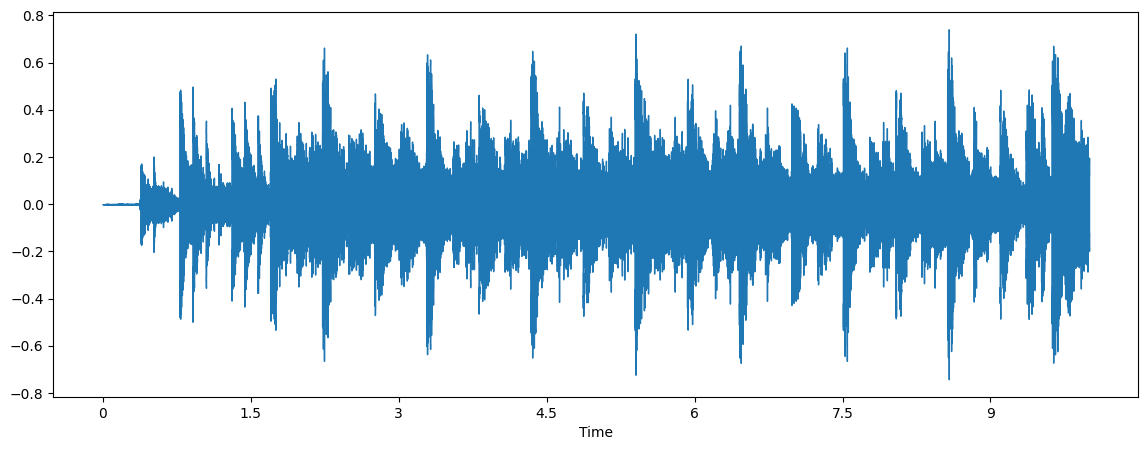

In [12]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio_rickW, sr=sr)

## Agregamos reverb

Importamos `pedalboard` y aplicamos [reverb](https://en.wikipedia.org/wiki/Reverberation) para que parezca que estamos en un cuarto muy grande

In [13]:
import pedalboard
reverb = pedalboard.Reverb()
reverb

<pedalboard.Reverb room_size=0.5 damping=0.5 wet_level=0.33 dry_level=0.4 width=1 freeze_mode=0 at 0x53d7f30>

In [14]:
reverb.room_size

0.5

In [15]:
reverb.wet_level = 1.0

In [16]:

effected = reverb(audio_rickW, sample_rate=sr)

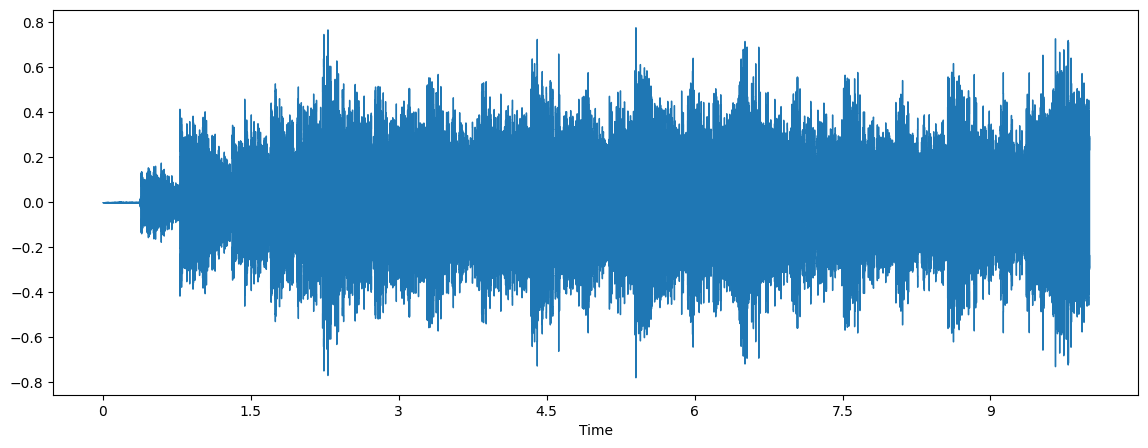

In [17]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(effected, sr=sr)

Let's listen to the result hear what it sounds like:

In [18]:
Audio(effected[:20 * sr], rate=sr)

Sounds like we've added some reverb!

## Cambiamos Effects

In [19]:
from pedalboard import Compressor, Gain, Phaser, Reverb

# Make a new Pedalboard object that contains plugins, each with their own (optional) settings
board = pedalboard.Pedalboard([
    Compressor(ratio=10, threshold_db=-20),
    Gain(gain_db=20),
    Phaser(),
    Reverb()
])

board

<Pedalboard with 4 plugins: [<pedalboard.Compressor threshold_db=-20 ratio=10 attack_ms=1 release_ms=100 at 0x855fa00>, <pedalboard.Gain gain_db=20 at 0x848e770>, <pedalboard.Phaser rate_hz=1 depth=0.5 centre_frequency_hz=1300 feedback=0 mix=0.5 at 0x7221600>, <pedalboard.Reverb room_size=0.5 damping=0.5 wet_level=0.33 dry_level=0.4 width=1 freeze_mode=0 at 0x71f9cc0>]>

Now, let's try running audio through this effect chain and see what it looks and sounds like:

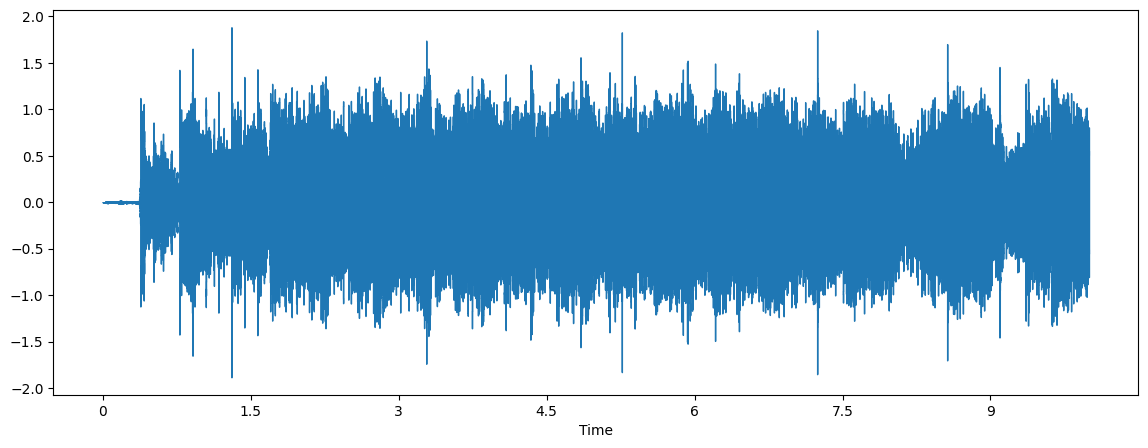

In [20]:
effected = board.process(audio_rickW, sr)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(effected, sr=sr)

In [21]:
Audio(effected[:20 * sr], rate=sr)